In [2]:
## Hyper Parameter Tuning - Aug 29 2023
## Optimal Hyper Parameters for a model
from sklearn import neighbors
# initialize with default hyperparameters
knn = neighbors.KNeighborsClassifier()  # This is our model
# examine the defaults
print(knn.get_params())


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [3]:
?knn

In [4]:
# initialize with k = 15 and all other hyperparameters as default
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
# examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}


In [5]:
# initialize with k = 15, weights = distance and all other hyperparameters as default
knn = neighbors.KNeighborsClassifier (n_neighbors=15, weights='distance')
# examine
print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}


# Manually tune Hyperparameters

In [8]:
from sklearn import neighbors, datasets, model_selection

In [9]:
# dataset
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [12]:
# no arguments specified
knn = neighbors.KNeighborsClassifier()

In [13]:
# 10 folds, scored on precision
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

In [14]:
# precision scores
print(cv)

[0.91666667 0.85       0.91666667 0.94736842 0.94594595 0.94444444
 0.97222222 0.92105263 0.96969697 0.97142857]


In [15]:
# average over all folds
print(round(cv.mean(), 2))

0.94


In [16]:
# k = 15
knn = neighbors.KNeighborsClassifier(n_neighbors=15)
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(round(cv.mean(), 2))

0.93


In [17]:
def evaluate_knn(k):
  knn = neighbors.KNeighborsClassifier(n_neighbors=k)
  cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
  print(round(cv.mean(), 2))
evaluate_knn(k=7)
evaluate_knn(k=3)
evaluate_knn(k=1)
evaluate_knn(k=5)

0.93
0.93
0.92
0.94


In [18]:
# k =5, weights evaluated using distance
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')
print(round(cv.mean(), 2))

0.93


# Grid Search - Systematically testing out every HP

In [19]:
from sklearn import neighbors, datasets, model_selection
# load data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data
# hyperparameter grid
grid = {
    'k': [1, 3, 5, 7]
}

In [20]:
# for every value of k in the grid
for k in grid['k']:

    # initialize the knn estimator
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # conduct a 10-fold cross-validation
    cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

    # calculate the average precision value over all folds
    cv_mean = round(cv.mean(), 3)

    # report the result
    print('With k = {}, mean precision = {}'.format(k, cv_mean))

With k = 1, mean precision = 0.919
With k = 3, mean precision = 0.928
With k = 5, mean precision = 0.936
With k = 7, mean precision = 0.931


In [21]:
# for every value of k in the grid
for k in grid['k']:

    # initialize the knn estimator
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)

    # print the hyperparameterization
    print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}


In [22]:
# hyperparameter grid
grid = {
    'k': [1, 3, 5, 7],
    'weight_function': ['uniform', 'distance']
}
# for every value of k in the grid
for k in grid['k']:

    # and every possible weight_function in the grid
    for weight_function in grid['weight_function']:

        # initialize the knn estimator
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)

        # conduct a 10-fold cross-validation
        cv = model_selection.cross_val_score(knn, X, y, cv=10, scoring='precision')

        # calculate the average precision value over all folds
        cv_mean = round(cv.mean(), 3)

        # report the result
        print('With k = {} and weight function = {}, mean precision = {}'.format(k, weight_function, cv_mean))

With k = 1 and weight function = uniform, mean precision = 0.919
With k = 1 and weight function = distance, mean precision = 0.919
With k = 3 and weight function = uniform, mean precision = 0.928
With k = 3 and weight function = distance, mean precision = 0.929
With k = 5 and weight function = uniform, mean precision = 0.936
With k = 5 and weight function = distance, mean precision = 0.93
With k = 7 and weight function = uniform, mean precision = 0.931
With k = 7 and weight function = distance, mean precision = 0.926


In [23]:
# for every value of k in the grid
for k in grid['k']:

  # and every possible weight_function in the grid
    for weight_function in grid['weight_function']:

        # initialize the knn estimator
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weight_function)
        # print the hyperparameterizations
        print(knn.get_params())

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n

# GridSearchCV

In [24]:
from sklearn import model_selection, datasets, neighbors
# load the data
cancer = datasets.load_breast_cancer()
# target
y = cancer.target
# features
X = cancer.data

In [25]:
# initialize the estimator
knn = neighbors.KNeighborsClassifier()

In [32]:
# grid contains k and the weight function
grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [33]:
# set up the grid search with scoring on precision and number of folds = 10
gscv = model_selection.GridSearchCV(estimator=knn, param_grid=grid, scoring='precision', cv=10)

In [34]:
# start the search
gscv.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7],
                         'weights': ['uniform', 'distance']},
             scoring='precision')

In [35]:
# view the results
print(gscv.cv_results_)

{'mean_fit_time': array([0.00133083, 0.00090125, 0.00081921, 0.00078282, 0.00071521,
       0.00069439, 0.00070457, 0.00066023, 0.00142305, 0.00127771,
       0.00155778, 0.0012289 , 0.00139296, 0.00172727, 0.00127935,
       0.00128834, 0.00172575, 0.00163271, 0.00168562, 0.00155153,
       0.00197692, 0.00194571, 0.00165713, 0.0016727 , 0.00078738,
       0.00075409, 0.00076451, 0.00071137, 0.00074658, 0.00073752,
       0.00078189, 0.00066288]), 'std_fit_time': array([1.05760347e-03, 3.30544785e-04, 2.04694979e-04, 2.44762613e-04,
       2.28344266e-05, 3.51135207e-05, 1.78303945e-05, 1.06261575e-04,
       2.48031056e-04, 4.52851536e-05, 3.94688255e-04, 3.71277060e-05,
       4.73845086e-04, 3.38906170e-04, 2.72784614e-05, 5.62516340e-05,
       2.56809505e-04, 6.35091291e-05, 8.42663814e-05, 3.52564895e-05,
       4.96286754e-04, 5.47693159e-04, 5.38819923e-05, 9.22906463e-05,
       9.58626674e-05, 1.18152918e-04, 8.68811304e-05, 4.62426402e-05,
       3.53675620e-05, 6.46875960e

In [36]:
import pandas as pd
# convert the results dictionary to a dataframe
results = pd.DataFrame(gscv.cv_results_)
# select just the hyperparameterizations tried, the mean test scores, order by score and show the top 5 models
print(
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False).head(5)
)

                                               params  mean_test_score
12  {'algorithm': 'ball_tree', 'n_neighbors': 5, '...         0.935549
4   {'algorithm': 'auto', 'n_neighbors': 5, 'weigh...         0.935549
20  {'algorithm': 'kd_tree', 'n_neighbors': 5, 'we...         0.935549
28  {'algorithm': 'brute', 'n_neighbors': 5, 'weig...         0.935549
6   {'algorithm': 'auto', 'n_neighbors': 7, 'weigh...         0.931078


<Axes: ylabel='params'>

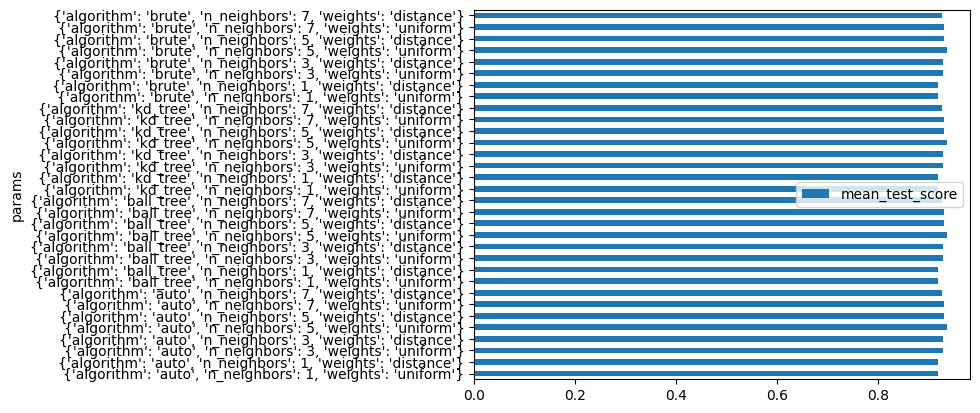

In [37]:
# visualise the result
results.loc[:,['params','mean_test_score']].plot.barh(x = 'params')

# SAME THING...different dataset (digits dataset )and model (SVM model)

In [38]:
from sklearn import datasets, svm, model_selection
# load data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [43]:
clr = svm.SVC(gamma='scale')

In [67]:
?clr

In [45]:
# hyperparameter grid. contains linear and polynomial kernels
grid = [
  {'kernel': ['linear']},
 {'kernel': ['poly'], 'degree': [2, 3, 4]}
 ]

In [46]:
# setting up the grid search to score on accuracy and evaluate over 10 folds
cv_spec = model_selection.GridSearchCV(estimator=clr, param_grid=grid, scoring='accuracy', cv=10)

In [47]:
# start the grid search
cv_spec.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'kernel': ['linear']},
                         {'degree': [2, 3, 4], 'kernel': ['poly']}],
             scoring='accuracy')

In [48]:
# what is the available information
print(cv_spec.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_kernel', 'param_degree', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [49]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(cv_spec.cv_results_)
print(
# show hyperparameterizations
results.loc[:,['params','mean_test_score']].sort_values('mean_test_score', ascending=False)
)

                            params  mean_test_score
2  {'degree': 3, 'kernel': 'poly'}         0.977734
3  {'degree': 4, 'kernel': 'poly'}         0.973284
1  {'degree': 2, 'kernel': 'poly'}         0.970500
0             {'kernel': 'linear'}         0.960487


<Axes: ylabel='params'>

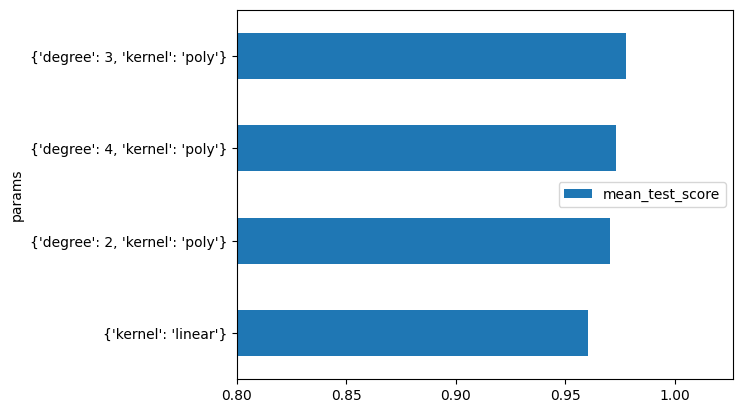

In [50]:
# visualize the result
(
    results.loc[:,['params','mean_test_score']]
    .sort_values('mean_test_score', ascending=True)
    .plot.barh(x='params', xlim=(0.8))
)

# Random Search

In [51]:
from sklearn import datasets, linear_model, model_selection
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data

In [52]:
# the first patient has index 0
print(y[0])

151.0


In [53]:
# let's look at the first patients data
print(
  dict(zip(diabetes.feature_names, X[0]))
)

{'age': 0.038075906433423026, 'sex': 0.05068011873981862, 'bmi': 0.061696206518683294, 'bp': 0.0218723855140367, 's1': -0.04422349842444599, 's2': -0.03482076283769895, 's3': -0.04340084565202491, 's4': -0.002592261998183278, 's5': 0.019907486170462722, 's6': -0.01764612515980379}


## Ridge Regression - HP : alpha : 1 ( linear regression), increasing from 1 to higher will prevent the model over fitting, controlling regularisation (making training difficult)

In [54]:
from sklearn import datasets, model_selection, linear_model
# load the data
diabetes = datasets.load_diabetes()
# target
y = diabetes.target
# features
X = diabetes.data
# initialise the ridge regression
reg = linear_model.Ridge()

In [55]:
?reg

In [56]:
from scipy import stats
# alpha ~ gamma(1,1)
param_dist = {'alpha': stats.gamma(a=1, loc=1, scale=2)}

In [57]:
# set up the random search to sample 100 values and score on negative mean squared error
rscv = model_selection.RandomizedSearchCV(estimator=reg, param_distributions=param_dist, n_iter=100, scoring='neg_mean_squared_error')
# start the search
rscv.fit(X,y)

RandomizedSearchCV(estimator=Ridge(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7dab1970ae90>},
                   scoring='neg_mean_squared_error')

In [58]:
import pandas as pd
# convert the results dictionary to a pandas data frame
results = pd.DataFrame(rscv.cv_results_)
# show the top 5 hyperparamaterizations
print(results.loc[:,['params','rank_test_score']].sort_values('rank_test_score').head(5))

                           params  rank_test_score
39  {'alpha': 1.0116382876621453}                1
13  {'alpha': 1.0188487088562914}                2
72   {'alpha': 1.030276014614293}                3
43  {'alpha': 1.0463408464806434}                4
61   {'alpha': 1.048346165969758}                5


# digits Data set with RFC algo

In [59]:
from sklearn import datasets
# import data
digits = datasets.load_digits()
# target
y = digits.target
# features
X = digits.data

In [60]:
from sklearn import ensemble
# an ensemble of 100 estimators
rfc = ensemble.RandomForestClassifier(n_estimators=100, random_state=100)

In [61]:
?rfc

In [62]:
# how many features do we have in our dataset?
n_features = X.shape[1]
print(n_features)

64


In [63]:
from scipy import stats
# we would like to smaple from criterion and max_features as discrete uniform distributions
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_features': stats.randint(low=1, high=n_features)
}

In [64]:
from sklearn import model_selection
# setting up the random search sampling 50 times and conducting 5-fold cross-validation
rscv = model_selection.RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, n_iter=50, cv=5, scoring='accuracy' , random_state=100)

In [65]:
# start the process
rscv.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7dab197084c0>},
                   random_state=100, scoring='accuracy')

In [66]:
import pandas as pd
# convert the dictionary of results to a pandas dataframe
results = pd.DataFrame(rscv.cv_results_)
# removing duplication
distinct_results = results.loc[:,['params','mean_test_score']]
# convert the params dictionaries to string data types
distinct_results.loc[:,'params'] = distinct_results.loc[:,'params'].astype('str')
# remove duplicates
distinct_results.drop_duplicates(inplace=True)
# look at the top 5 best hyperparamaterizations
distinct_results.sort_values('mean_test_score', ascending=False).head(5)

,params,mean_test_score
3,"{'criterion': 'gini', 'max_features': 11}",0.940470
48,"{'criterion': 'gini', 'max_features': 4}",0.939913
19,"{'criterion': 'gini', 'max_features': 5}",0.937700
14,"{'criterion': 'gini', 'max_features': 3}",0.937694
21,"{'criterion': 'entropy', 'max_features': 8}",0.936582
